In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 1 of Set 1 | otjiwarongo
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | shingu
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | pemangkat
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | chiriqui grande
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | khorixas
Processing Record 21 of Set 1 | bariri
Processing Record 22 of Set 1 | caiaponia
Processing Record 23 of Set

Processing Record 37 of Set 4 | sinnamary
Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | tapaua
City not found. Skipping...
Processing Record 40 of Set 4 | hihifo
City not found. Skipping...
Processing Record 41 of Set 4 | jizan
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | panama city
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | catuday
Processing Record 48 of Set 4 | snina
Processing Record 49 of Set 4 | temizhbekskaya
Processing Record 50 of Set 4 | amga
Processing Record 1 of Set 5 | kumluca
Processing Record 2 of Set 5 | kondinskoye
Processing Record 3 of Set 5 | uwayl
City not found. Skipping...
Processing Record 4 of Set 5 | katsina
Processing Record 5 of Set 5 | qandala
Processing Record 6 of Set 5 | samaniego
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | nishihara
Processing Record 9 of Set 5 | b

Processing Record 19 of Set 8 | mana
Processing Record 20 of Set 8 | kyabram
Processing Record 21 of Set 8 | narsaq
Processing Record 22 of Set 8 | gravdal
Processing Record 23 of Set 8 | roma
Processing Record 24 of Set 8 | lumberton
Processing Record 25 of Set 8 | beringovskiy
Processing Record 26 of Set 8 | union
Processing Record 27 of Set 8 | bacuit
City not found. Skipping...
Processing Record 28 of Set 8 | kedougou
Processing Record 29 of Set 8 | havoysund
Processing Record 30 of Set 8 | camopi
Processing Record 31 of Set 8 | nguiu
City not found. Skipping...
Processing Record 32 of Set 8 | barinas
Processing Record 33 of Set 8 | shihezi
Processing Record 34 of Set 8 | lander
Processing Record 35 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 8 | arman
Processing Record 37 of Set 8 | gashua
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | baoding
Processing Record 40 of Set 8 | muzhi
Processing Record 41 of Set 8 | canora

Processing Record 7 of Set 12 | san luis
Processing Record 8 of Set 12 | kurchum
Processing Record 9 of Set 12 | hauterive
Processing Record 10 of Set 12 | koshurnikovo
Processing Record 11 of Set 12 | hovd
Processing Record 12 of Set 12 | zeya
Processing Record 13 of Set 12 | port-gentil
Processing Record 14 of Set 12 | kamaishi
Processing Record 15 of Set 12 | shakawe
Processing Record 16 of Set 12 | languyan
Processing Record 17 of Set 12 | laramie
Processing Record 18 of Set 12 | mabaruma
Processing Record 19 of Set 12 | tukrah
Processing Record 20 of Set 12 | krasnoselkup
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | staryy nadym
Processing Record 24 of Set 12 | la libertad
Processing Record 25 of Set 12 | nichinan
Processing Record 26 of Set 12 | waitati
Processing Record 27 of Set 12 | chara
Processing Record 28 of Set 12 | ossora
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 |

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Otjiwarongo,-20.4637,16.6477,73.08,47,74,4.65,NA,2022-01-26 21:56:18
1,Salalah,17.0151,54.0924,69.89,64,0,2.30,OM,2022-01-26 21:47:11
2,Tuktoyaktuk,69.4541,-133.0374,-2.20,78,40,18.41,CA,2022-01-26 21:47:14
3,Mataura,-46.1927,168.8643,56.48,68,40,7.27,NZ,2022-01-26 21:56:20
4,Shingu,33.7333,135.9833,39.31,78,99,6.85,JP,2022-01-26 21:56:20
5,Hobart,-42.8794,147.3294,68.22,70,75,5.99,AU,2022-01-26 21:56:21
6,Pemangkat,1.1667,108.9667,76.84,87,100,7.40,ID,2022-01-26 21:56:22
7,Ixtapa,20.7000,-105.2000,76.23,80,97,5.01,MX,2022-01-26 21:56:23
8,Busselton,-33.6500,115.3333,56.57,88,5,11.10,AU,2022-01-26 21:47:21
9,Thompson,55.7435,-97.8558,3.36,72,40,14.97,CA,2022-01-26 21:47:25


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

new_city_data_df = city_data_df[new_column_order]

In [15]:
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Otjiwarongo,NA,2022-01-26 21:56:18,-20.4637,16.6477,73.08,47,74,4.65
1,Salalah,OM,2022-01-26 21:47:11,17.0151,54.0924,69.89,64,0,2.30
2,Tuktoyaktuk,CA,2022-01-26 21:47:14,69.4541,-133.0374,-2.20,78,40,18.41
3,Mataura,NZ,2022-01-26 21:56:20,-46.1927,168.8643,56.48,68,40,7.27
4,Shingu,JP,2022-01-26 21:56:20,33.7333,135.9833,39.31,78,99,6.85
...,...,...,...,...,...,...,...,...,...
553,Brcko,BA,2022-01-26 22:11:02,44.8728,18.8083,36.14,86,49,4.56
554,Tuatapere,NZ,2022-01-26 22:15:17,-46.1333,167.6833,57.81,62,69,9.04
555,Changtu,CN,2022-01-26 22:15:18,42.7788,124.0955,8.82,87,5,2.51
556,Kiboga,UG,2022-01-26 22:15:18,0.9161,31.7742,67.12,52,37,2.01


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

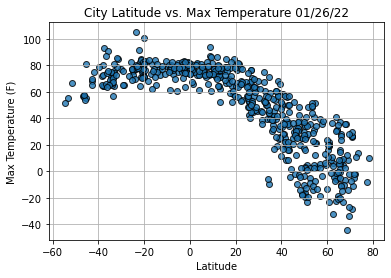

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

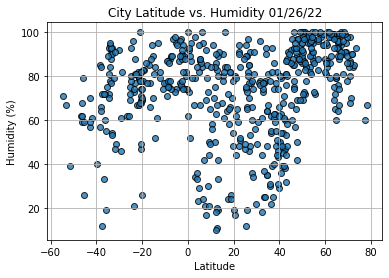

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

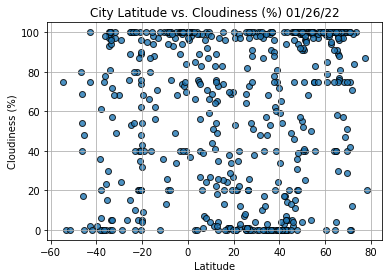

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

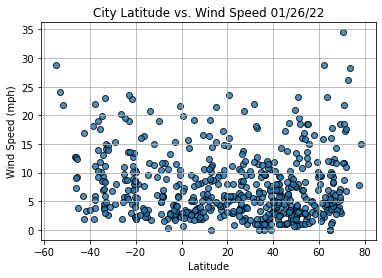

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()